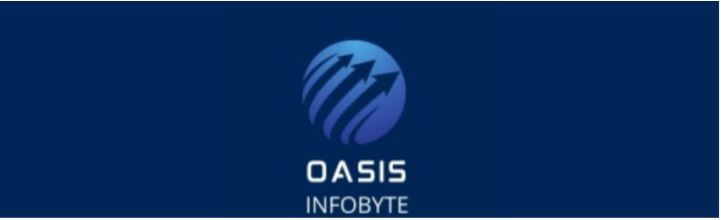

 ## Oasis Internship, January- 2024
 
 ### Samala Sandeep, Data Analytics Intern

# Project Title: Customer Segmentation Analysis

## DATASET LINK : https://www.kaggle.com/datasets/jackdaoud/marketing-data

# Introduction:

In the dynamic landscape of e-commerce, understanding customer behavior is paramount for businesses striving to tailor their strategies for maximum impact. The aim of this data analytics project is to delve into the realm of customer segmentation for an e-commerce company, unraveling patterns and insights that can drive targeted marketing, enhance customer satisfaction, and refine overall business strategies.

# Project Goals:


Data Collection:
Acquire a comprehensive dataset comprising crucial information such as customer profiles, purchase history, and relevant behavioral data. A robust dataset forms the foundation for meaningful insights.


Data Exploration and Cleaning:
Conduct a thorough exploration of the dataset, unraveling its intricacies and structure. Address any missing or inconsistent data, ensuring that the subsequent analysis is based on reliable and accurate information.


Descriptive Statistics:
Calculate and derive key metrics that shed light on customer behavior. This includes metrics like average purchase value, frequency of purchases, and other relevant statistics that paint a vivid picture of customer engagement.


Customer Segmentation:
Employ clustering algorithms, with a focus on widely used techniques such as K-means clustering, to categorize customers into distinct segments based on their behavior and purchase patterns. Uncover similarities within each group and differences between them.


Visualization:
Leverage visualization techniques to effectively communicate the segmented data. Create visually appealing representations such as scatter plots and bar charts, aiding in the interpretation of complex patterns and facilitating better decision-making.


Insights and Recommendations:
Analyze the characteristics of each customer segment to extract meaningful insights. Formulate actionable recommendations for targeted marketing strategies, personalized customer experiences, and overall business improvements.

# Learning Objectives:


Practical Experience with Clustering Algorithms:
Gain hands-on experience in applying clustering algorithms, especially the widely used K-means algorithm. Understand the nuances of segmentation and how it can be effectively implemented in real-world scenarios.


Data Cleaning and Exploration Skills:
Develop skills in exploring and cleaning datasets, recognizing patterns, and handling missing or inconsistent data. These skills are crucial for ensuring the reliability and validity of subsequent analyses.


Visualization Techniques for Conveying Insights:
Learn and apply visualization techniques to convey complex insights in a clear and concise manner. Develop proficiency in creating compelling visual representations that aid in communicating findings to diverse audiences.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset from an Excel file

data = pd.read_csv("Task2.csv")

data


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [3]:
print(data.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [4]:
# Display basic information about the dataset
print(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
# Descriptive statistics for numerical columns
print(data.describe())



              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [6]:
# Unique values in categorical columns
print(data['marital_Divorced'].value_counts())
print()
print(data['education_Graduation'].value_counts())



0    1975
1     230
Name: marital_Divorced, dtype: int64

1    1113
0    1092
Name: education_Graduation, dtype: int64


In [7]:
# Correlation matrix to identify relationships between variables
correlation_matrix = data.corr()
print(correlation_matrix)

                        Income   Kidhome  Teenhome   Recency  MntWines  \
Income                1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome              -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome              0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency               0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines              0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits             0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts       0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts       0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts      0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds          0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases    -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases       0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases   0.710057 -0.5198

In [8]:
# Check for missing values
print(data.isnull().sum())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
# Drop rows with missing values or impute missing values
data_cleaned = data.dropna()

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Convert categorical columns to numerical (if needed)
data_cleaned['marital_Divorced'] = data_cleaned['marital_Divorced'].astype(int)
data_cleaned['education_Graduation'] = data_cleaned['education_Graduation'].astype(int)

# Standardize column names (optional)
data_cleaned.columns = data_cleaned.columns.str.lower().str.replace(' ', '_')

# Save cleaned data to a new file
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [10]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [11]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [12]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

# Data Exploration

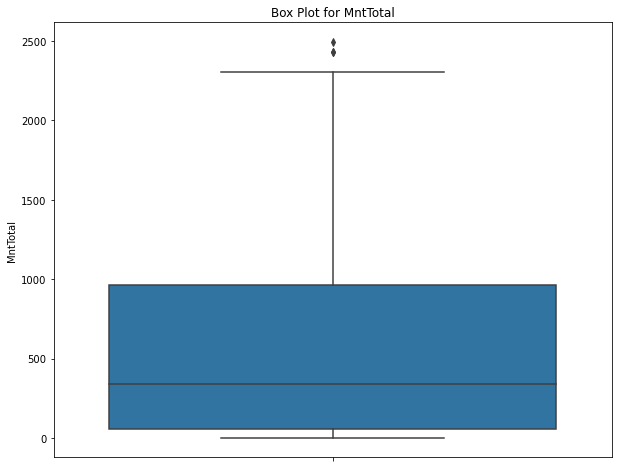

In [13]:
plt.figure(figsize=(10,8))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [14]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [15]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


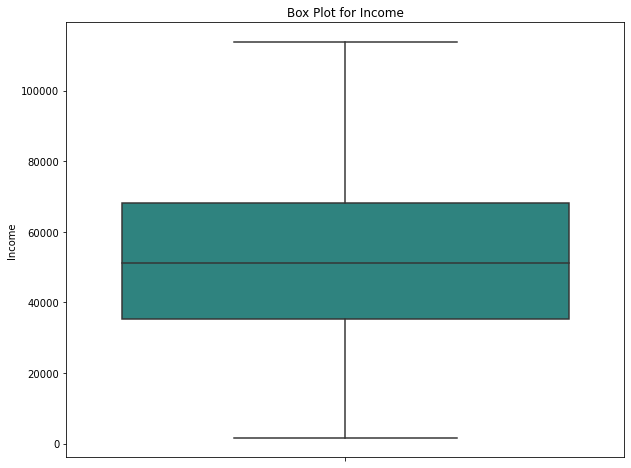

In [16]:
plt.figure(figsize=(10,8))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

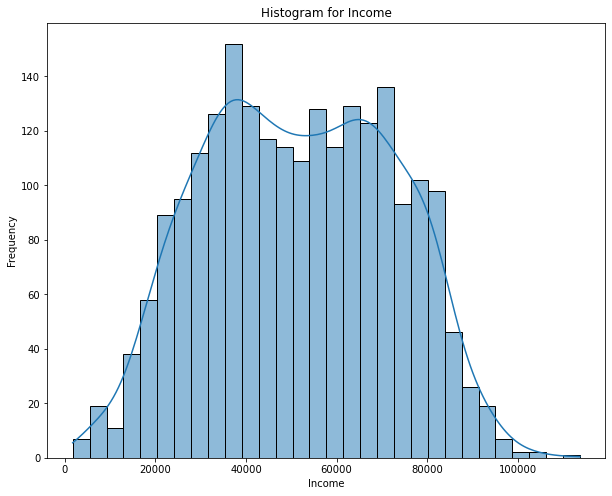

In [17]:
plt.figure(figsize=(10, 8))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


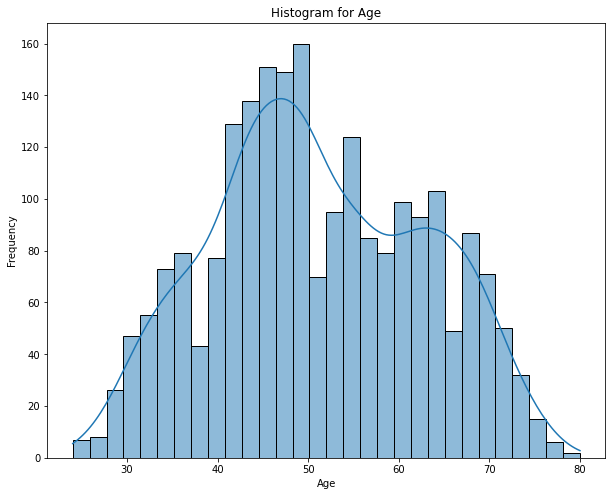

In [18]:
plt.figure(figsize=(10, 8))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


Symmetry:
A symmetrical distribution implies that the data is evenly distributed on both sides of the central point. In the context of age, this suggests that there's no strong bias towards younger or older individuals in your dataset.


Skewness:
A skewness close to zero indicates a relatively symmetrical distribution. Skewness measures the asymmetry of a distribution. A value of 0.09, being close to zero, suggests that the distribution is approximately symmetrical, with a slight tendency towards the right.


Kurtosis:
Kurtosis measures the sharpness of the peak (peakedness) and the thickness of the tails of a distribution. A negative kurtosis of -0.8 suggests a distribution that is less peaked and has lighter tails compared to a normal distribution. It's an indication of a more flat or platykurtic shape.

# Correlation Matrix

To streamline the correlation analysis and focus on segments of interest, you can group columns related to different aspects of customer behavior. In your case, you want to explore correlations with 'MntTotal' and potentially repeat the process for each product category.


Grouping Columns:
Group columns based on their relevance. For instance, you can create groups like 'Demographics' (including 'Age', 'Income', 'Marital Status', etc.), 'Purchase History' (including 'NumWebPurchases', 'NumCatalogPurchases', etc.), and 'Product Categories' (grouping various 'Mnt' columns for different product types).


Correlation Analysis:
Analyze the correlation matrix within each group. Focus on how columns within each group correlate with the 'MntTotal' column. This helps identify which demographic or purchase behavior factors are more strongly associated with overall spending.


Repeat for Product Categories:
If interested in specific product categories, repeat the process for each product group. For example, analyze the correlation between 'MntWines' and other wine-related columns.


Segmentation Insights:
Based on the correlations, you can gain insights into customer segments. High correlations may indicate that certain demographics or purchasing behaviors strongly influence overall spending.


Repeat for Each Product Type:
If you're interested in understanding customer behavior for each product type, repeat the correlation analysis for 'MntFruits', 'MntMeatProducts', etc.


Decision on Segmentation:
Determine how you want to segment customers based on the identified correlations. For example, you might create segments like 'High Overall Spenders', 'Frequent Web Shoppers', or 'Enthusiastic Wine Buyers' depending on the focus of your analysis.
By breaking down the analysis into manageable groups and focusing on correlations within those groups, you can gain a more targeted understanding of how different factors influence customer spending behavior.

In [20]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

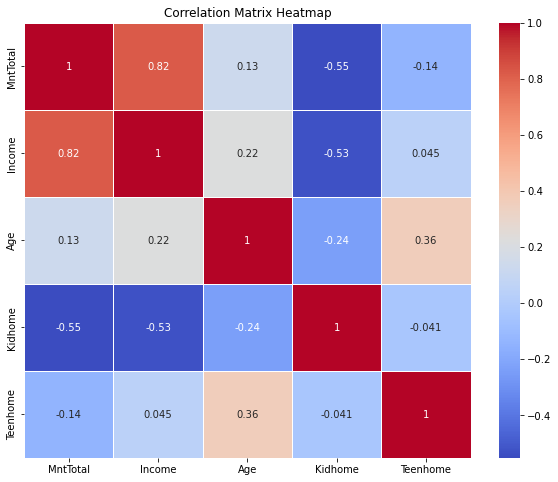

In [21]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The observed strong positive correlation between 'MntTotal' and 'Income' suggests that as a customer's income increases, their overall spending on products ('MntTotal') tends to increase as well. This aligns with the general expectation that individuals with higher incomes may have more disposable income for discretionary spending on various products.

Additionally, the intermediate negative correlation between 'MntTotal' and 'Kidhome' indicates that there is a moderate inverse relationship between the overall spending and the presence of children at home. This could imply that households with fewer or no children tend to spend more on products in general.

The interesting insight here is the nearly equivalent negative correlation between 'Income' and 'Kidhome' with both 'MntTotal' and 'Kidhome'. This suggests a potential relationship where higher income is associated with a lower likelihood of having children at home, which in turn is associated with higher overall spending.

# Point-Biserial correlations

Pearson Correlation vs. Point-Biserial Correlation:
While Pearson correlation is appropriate for assessing the linear relationship between two continuous variables, Point-Biserial correlation is specifically designed for measuring the linear relationship between a binary variable and a continuous variable.



Interpretation of Point-Biserial Correlation:
The Point-Biserial correlation coefficient ranges from -1 to 1, similar to Pearson correlation. A positive value indicates a positive relationship, while a negative value indicates a negative relationship. The absolute value represents the strength of the correlation.



Application to Marital Status and MntTotal:
In your case, applying Point-Biserial correlation to understand the relationship between 'MntTotal' and marital status can provide insights into how the spending behavior varies between individuals with different marital statuses.



Example Interpretation:
For instance, a positive Point-Biserial correlation might suggest that married individuals tend to have higher spending ('MntTotal') compared to unmarried individuals, or vice versa.



Statistical Significance:
As with any correlation analysis, it's important to assess the statistical significance of the correlation coefficient to determine whether the observed relationship is likely due to chance or is statistically meaningful.



Data Transformation (if needed):
Depending on the software you are using, you may need to encode the binary variable into numerical form (e.g., 0 and 1) before calculating the Point-Biserial correlation.

In [22]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')    

0.0053: Point-Biserial Correlation for marital_Divorced with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow with p-value 0.0826


In [23]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}') 

-0.0593: Point-Biserial Correlation for education_2n Cycle with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD with p-value 0.0005


# Feature Engineering
In this section:

New feature: Marital
New feature: In_relationship
New feature: Marital
The data frame contains 5 columns to reflect marital status. We are going to create a new column 'marital' with values: Divorced, Married, Single, Together, Widow. This column will allow us to draw some additional plots.


Marital:
A new categorical column 'marital' is created, consolidating information from the existing marital status columns. Values include Divorced, Married, Single, Together, and Widow.


In_relationship:
It's not explicitly described, but a new feature 'In_relationship' is mentioned. This could potentially be a binary column indicating whether a person is currently in a relationship or not.


Marital (Repeated):
There is a repetition of the mention of creating a new feature 'Marital.' It seems this might be an oversight or repetition in the description.


The creation of these features, especially 'marital,' facilitates data analysis by simplifying the representation of marital status and enabling the generation of additional plots for a more comprehensive understanding of the dataset.

In [24]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)


Text(0, 0.5, 'MntTotal')

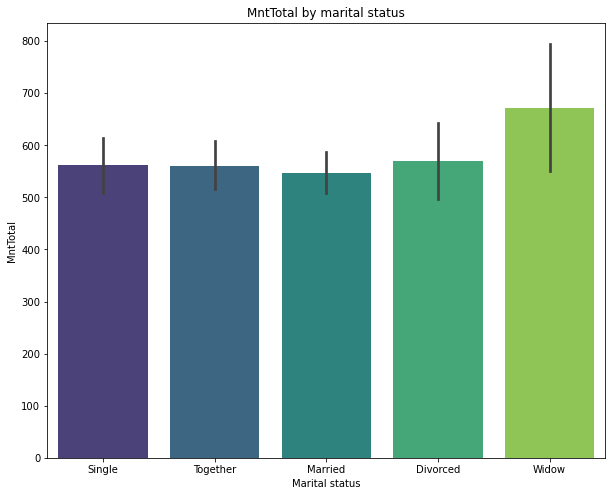

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [26]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head() 

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


# K-Means Clustering

Standardizing Data:
Standardization involves scaling the features of the dataset to have a mean of 0 and a standard deviation of 1. This step is essential for K-Means, as it is sensitive to the scale of features. Standardizing ensures that all features contribute equally to the clustering process.


Principal Component Analysis (PCA):
Principal Component Analysis is a dimensionality reduction technique that transforms the original features into a new set of uncorrelated variables called principal components. PCA is often applied before K-Means clustering to reduce the dimensionality of the data, making it computationally more efficient while retaining as much of the original information as possible.


Elbow Method:
The Elbow Method is a technique used to find the optimal number of clusters (k) in a K-Means clustering algorithm. It involves running K-Means clustering on the dataset for a range of values of k (e.g., from 1 to 10) and plotting the sum of squared distances from each point to its assigned center. The "elbow" in the plot represents the point where adding more clusters does not significantly improve the fit of the model.


Silhouette Score Analysis:
The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Silhouette Score analysis can be used to evaluate the quality of clustering for different values of k and choose the optimal number of clusters.

In [27]:
from sklearn.cluster import KMeans

# Standardising data
K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use standard scaling .

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.287125e-17,-9.246817e-17,-6.705707e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


# Principal Component Analysis (PCA)
PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

In [29]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]


# Elbow method
The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [30]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

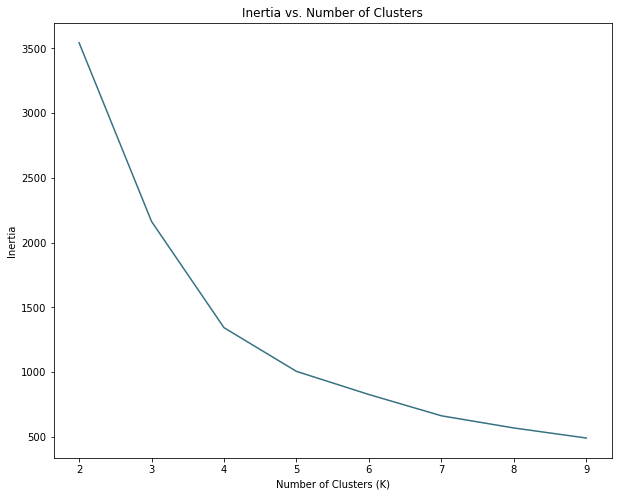

In [31]:
plt.figure(figsize=[10,8]),
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


# Silhouette score analysis
Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

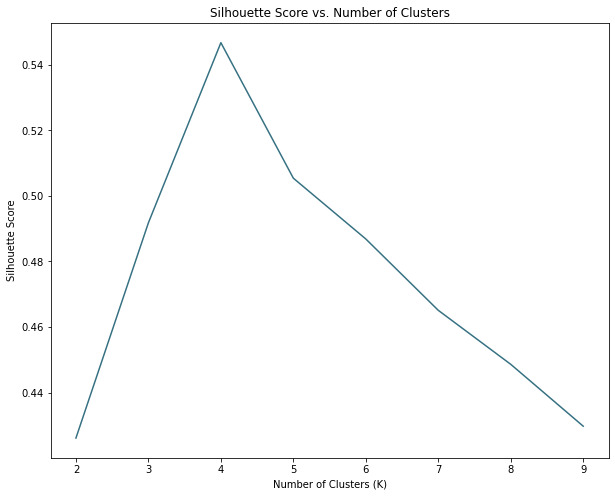

In [32]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[10,8])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [33]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

# Exploration of Clusters

Visualisation of clusters

Mean consumption of different product types by cluster

Cluster sizes

Income by cluster

In_relationship feature by cluster

# Visualisation of clusters

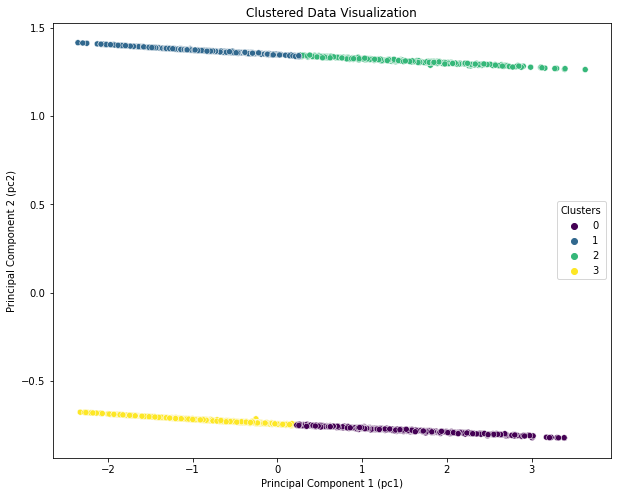

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [35]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,71818.929329,1147.372792,1.0
1,37332.339956,150.761589,0.0
2,71946.155488,1159.612805,0.0
3,37892.819883,158.463158,1.0


# Mean consumption of different product types by cluster

In [36]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1147.372792,1076.279152,623.261484,52.489399,341.326855,75.577739,54.717314,71.093640
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488
3,3,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


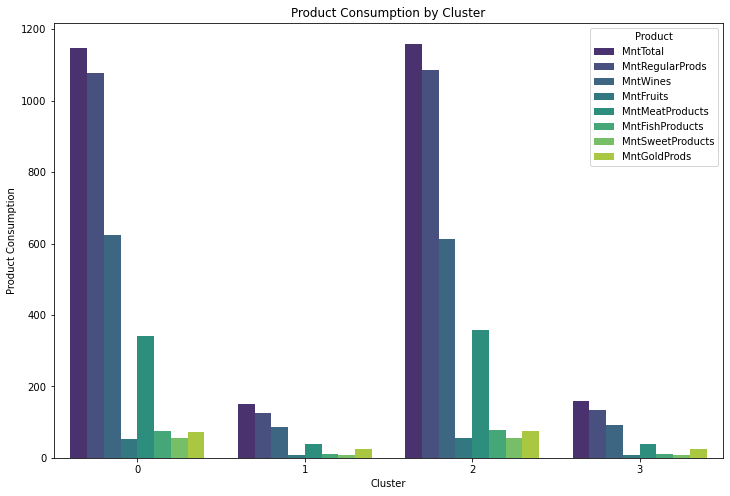

In [37]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12,8))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

# Cluster sizes

Text(0, 0.5, 'MntTotal')

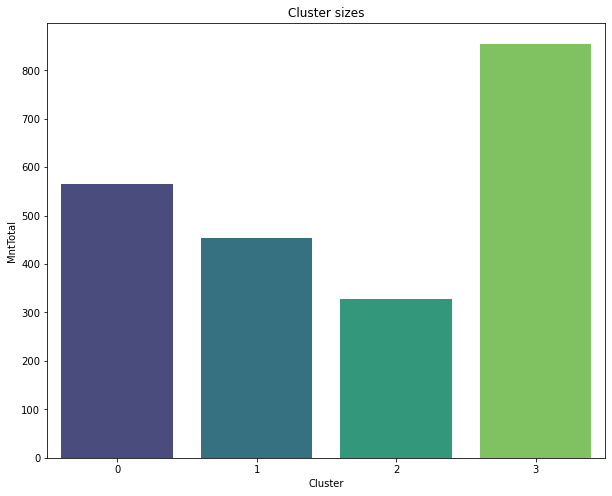

In [38]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [39]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,566,26.0
1,1,453,21.0
2,2,328,15.0
3,3,855,39.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


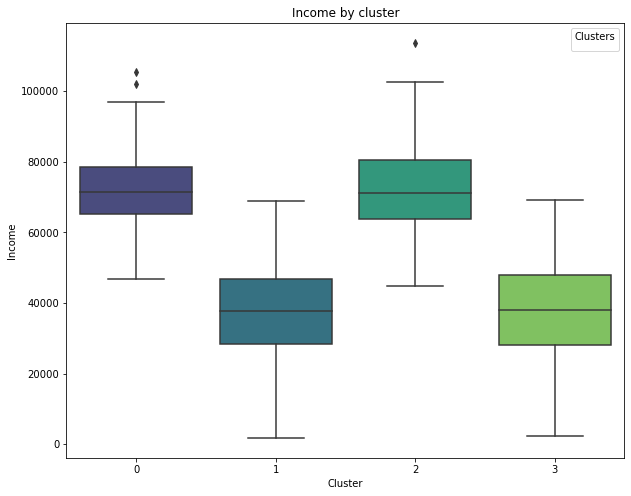

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

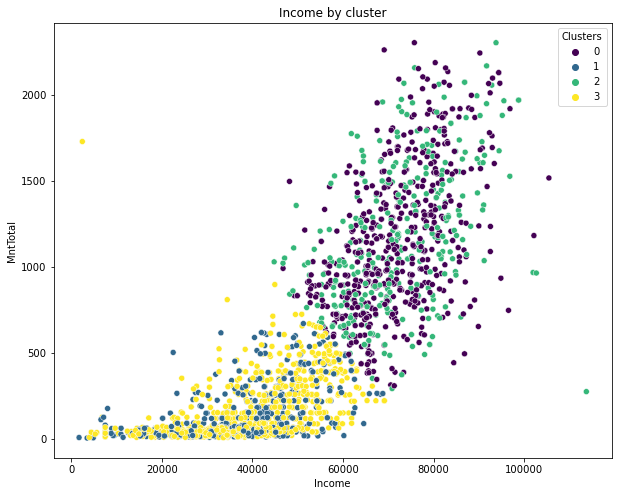

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Text(0, 0.5, 'In_relationship')

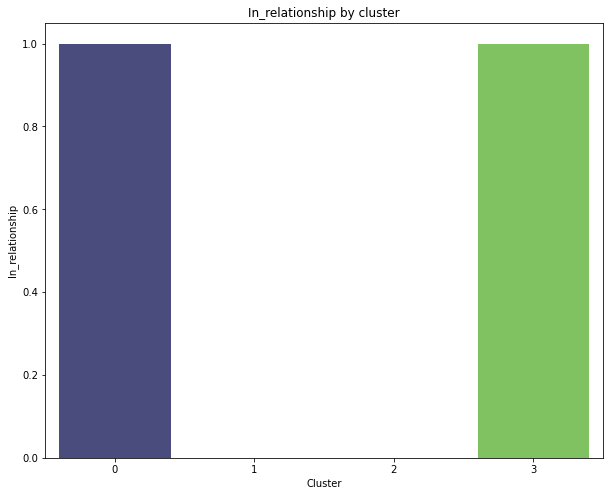

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

# Results Summary:


## Optimal Number of Clusters:
The K-means clustering analysis suggested an optimal number of clusters as 4. This conclusion was derived from both the Elbow Method and Silhouette Analysis, which consistently pointed to 4 clusters as a reasonable choice. The silhouette score reached its peak at k=4.

### Cluster Characteristics:

Cluster 0: High value customers in a relationship (married or together)
Represents 26% of the customer base.
Comprises high-income customers in a relationship.


Cluster 1: Low value single customers
Represents 21% of the customer base.
Consists of low-income customers who are single.


Cluster 2: High value single customers
Represents 15% of the customer base.
Encompasses high-income single customers.


Cluster 3: Low value customers in a relationship
Represents 39% of the customer base.
Comprises low-income customers in a relationship.


### Recommendations:


Cluster 0: High value customers in a relationship
Promote high-quality wines.
Utilize family-oriented promo-images.


Cluster 1: Low value single customers
Implement promotions with discounts and coupons.
Consider a loyalty program to stimulate more frequent purchases.


Cluster 2: High value single customers
Focus on wine and fruit promotions.
Use promo images depicting friends, parties, or single trips.


Cluster 3: Low value customers in a relationship
Concentrate on family-oriented offers and discounts.


### Opportunities for Further Analysis:


Children's Influence on Consumed Products:
Investigate how the presence of children influences purchasing behavior within each cluster.


Education Influence:
Analyze the impact of education on customer behavior and spending patterns.


Analysis of Frequent Buyers:
Explore patterns among customers who make frequent purchases.


Sales Channels Analysis:
Examine customer preferences across different sales channels, such as in-store or online.


Response to Marketing Campaigns:
Evaluate the effectiveness of past marketing campaigns for each cluster.


Gender Data Inclusion:
Enhance the dataset by adding gender data to provide a more comprehensive view of customer demographics.


Testing Different Clustering Algorithms:
Experiment with alternative clustering algorithms to determine if they provide better insights or performance.


### Detailed Recommendations:
Tailoring marketing strategies for each cluster based on their unique characteristics is crucial. Employ targeted promotions, loyalty programs, and campaign imagery that align with the specific interests and demographics of each cluster. Additionally, deeper analyses can unearth more profound insights into customer behavior, allowing for continuous refinement of marketing and business strategies.



# Conclusion:
Tailoring marketing strategies based on the unique characteristics of each cluster is key to maximizing engagement and sales. Continuously analyzing customer behavior and testing different strategies will help refine marketing approaches for optimal results.







